# Exploratory Data Analysis (Students Mental Health)

## Initial configuration

### Install libraries

In [ ]:
!pip install --upgrade pip
!pip install numpy pandas matplotlib seaborn empiricaldist statsmodels sklearn pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=f751c97b46555accc63ea8b807e0aab21afe2849864d829b8b1fbd2ed126991c
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=459406f0500648251340821d2d163f2043404a271406ae9cb8b63f084231cd80
  Stored in dir

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import empiricaldist
import janitor

## Data validation

### Load dataset

In [ ]:
url = 'https://raw.githubusercontent.com/camilogranda/Students-mental-health-data-analysis/main/Student%20Mental%20health.csv'
students_df = pd.read_csv(url)
students_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Explore data info

In [ ]:
students_df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [ ]:
students_df[students_df['Choose your gender'] == 'Male'].describe()

,Age
count,25.00000
mean,20.52000
std,2.48529
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [ ]:
students_df.shape

(101, 11)

### Data cleaning

#### Deal with null values

In [ ]:
(
    students_df
    .isnull()
    .any()
)

Timestamp                                       False
Choose your gender                              False
Age                                              True
What is your course?                            False
Your current year of Study                      False
What is your CGPA?                              False
Marital status                                  False
Do you have Depression?                         False
Do you have Anxiety?                            False
Do you have Panic attack?                       False
Did you seek any specialist for a treatment?    False
dtype: bool

In [ ]:
students_df[students_df.isna().any(axis=1)]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [ ]:
df = students_df.fillna(students_df.mean(numeric_only=True))
df[43:44]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,20.53,BIT,year 1,0 - 1.99,No,No,No,No,No


#### Change column names

In [ ]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [ ]:
df.rename(columns = {'Timestamp': 'timestamp', 'Choose your gender': 'gender', 'Age': 'age', 'What is your course?': 'course',
       'Your current year of Study': 'current_year_of_study', 'What is your CGPA?': 'CGPA', 'Marital status': 'marital_status',
       'Do you have Depression?': 'depression', 'Do you have Anxiety?': 'anxiety',
       'Do you have Panic attack?': 'panic_attack',
       'Did you seek any specialist for a treatment?': 'look_for_specialist'},inplace=True)
df

,timestamp,gender,age,course,current_year_of_study,CGPA,marital_status,depression,anxiety,panic_attack,look_for_specialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


#### Change datatypes

In [ ]:
from datetime import datetime as dt

In [ ]:
df = df.convert_dtypes()
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

#### Convert strings to lowercase

In [ ]:
df['current_year_of_study'] = df.loc[:,'current_year_of_study'].str.lower()

In [ ]:
df.current_year_of_study.unique()

<StringArray>
['year 1', 'year 2', 'year 3', 'year 4']
Length: 4, dtype: string

In [ ]:
df

,timestamp,gender,age,course,current_year_of_study,CGPA,marital_status,depression,anxiety,panic_attack,look_for_specialist
0,2020-07-08 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-07-08 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-07-08 12:05:00,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-07-08 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-07-08 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,2020-07-13 21:21:42,Male,18.0,Engineering,year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,2020-07-13 21:22:56,Female,19.0,Nursing,year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,2020-07-13 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


### Explore data

In [ ]:
df.dtypes

timestamp                datetime64[ns]
gender                           string
age                             Float64
course                           string
current_year_of_study            string
CGPA                             string
marital_status                   string
depression                       string
anxiety                          string
panic_attack                     string
look_for_specialist              string
dtype: object

In [ ]:
df[df['gender'] == 'Female']['gender'].value_counts()


Female    75
Name: gender, dtype: Int64

In [ ]:
df.head()

,timestamp,gender,age,course,current_year_of_study,CGPA,marital_status,depression,anxiety,panic_attack,look_for_specialist
0,2020-07-08 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-07-08 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-07-08 12:05:00,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-07-08 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-07-08 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


#### Gender proportion

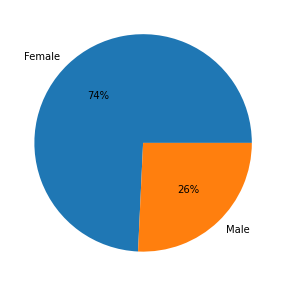

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df.gender.value_counts(),labels=df.gender.value_counts().index, autopct='%1.0f%%')
plt.show()

#### Current year of study proportion

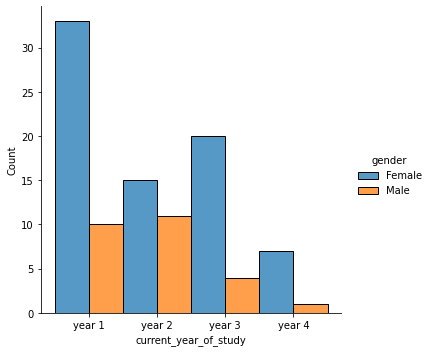

In [ ]:
sns.displot(
    data=df,
    x=df.current_year_of_study,
    hue='gender',
    multiple='dodge'
)

#### CGPA proportion

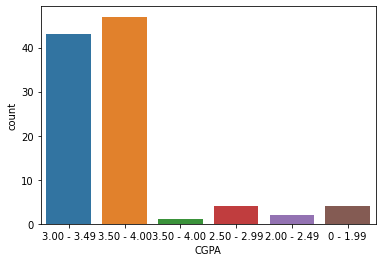

In [ ]:
sns.countplot(
    data=df,
    x='CGPA'
)
plt.show()

In [ ]:
print(df.CGPA.value_counts())
print()
print('CGPA of 3.0 or above: %.2f%%' %(df.CGPA.value_counts()[:2].sum() / len(df) * 100))

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: CGPA, dtype: Int64

CGPA of 3.0 or above: 89.11%


### Mental health proportions

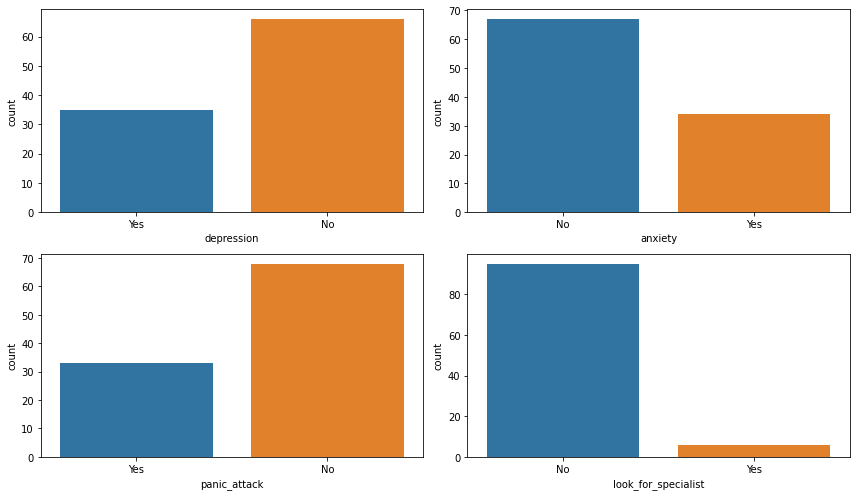

In [ ]:
column = df.iloc[:,7:].columns
subplot = (221, 222, 223, 224)
plt.figure(figsize=(12,7))

for i in range(len(column)):
  plt.subplot(subplot[i])
  sns.countplot(
      data=df,
      x=df[column[i]]
  )
  plt.tight_layout()

In [ ]:
col = df.iloc[:,7:].columns

for i in range(len(col)):
  print(col[i]+': %.2f%%' %(df[df[col[i]] == 'Yes'][col[i]].value_counts()[0]/len(df)*100))

depression: 34.65%
anxiety: 33.66%
panic_attack: 32.67%
look_for_specialist: 5.94%


In [ ]:
print('%g'%round(2.2323,3))

2.232


#### Mental health by gender

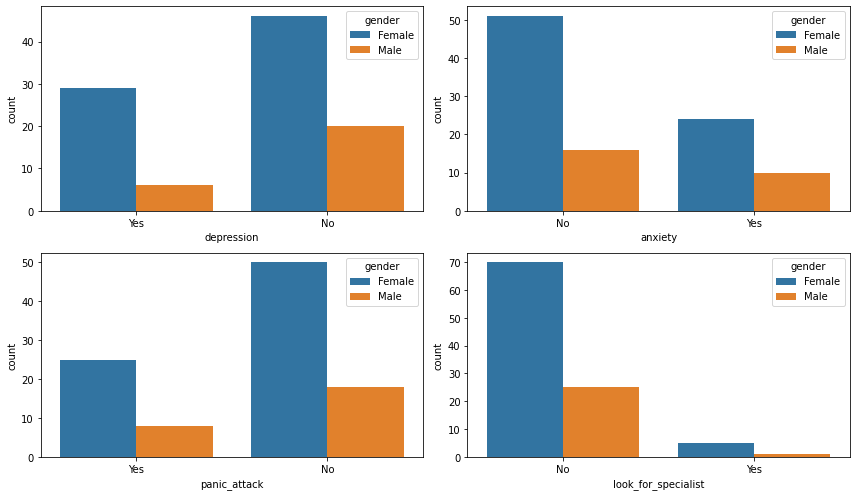

In [ ]:
column = df.iloc[:,7:].columns
subplot = (221, 222, 223, 224)
plt.figure(figsize=(12,7))

for i in range(len(column)):
  plt.subplot(subplot[i])
  sns.countplot(
      data=df,
      x=df[column[i]],
      hue='gender'
  )
  plt.tight_layout()

#### Mental health by current year of study

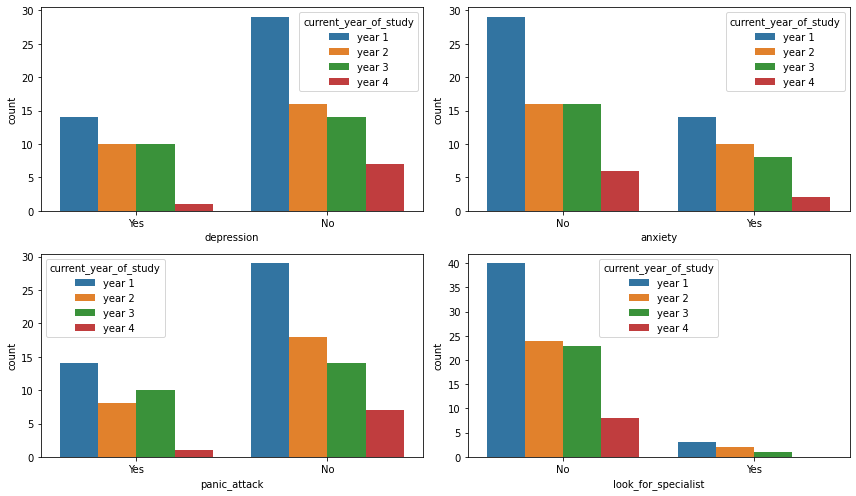

In [ ]:
column = df.iloc[:,7:].columns
subplot = (221, 222, 223, 224)
plt.figure(figsize=(12,7))

for i in range(len(column)):
  plt.subplot(subplot[i])
  sns.countplot(
      data=df,
      x=df[column[i]],
      hue='current_year_of_study',
  )
  plt.tight_layout()

#### Mental health by CGPA (Cumulative Grade Point Average)

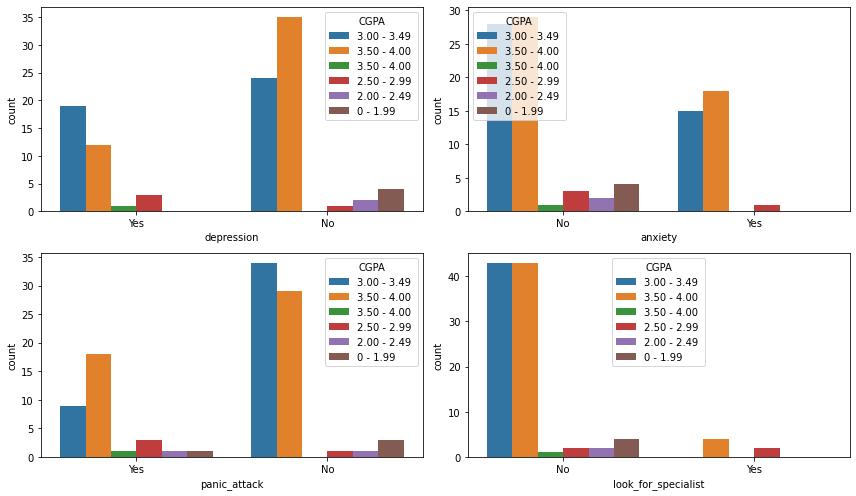

In [ ]:
column = df.iloc[:,7:].columns
subplot = (221, 222, 223, 224)
plt.figure(figsize=(12,7))

for i in range(len(column)):
  plt.subplot(subplot[i])
  sns.countplot(
      data=df,
      x=df[column[i]],
      hue='CGPA',
  )
  plt.tight_layout()

### CGPA proportion

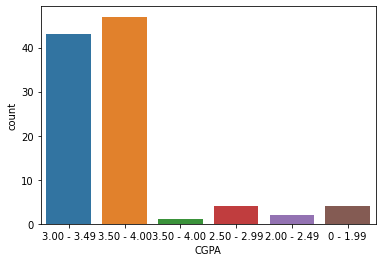

In [ ]:
sns.countplot(
    data=df,
    x='CGPA'
)
plt.show()

In [ ]:
print(df.CGPA.value_counts())
print()
print('CGPA of 3.0 or above: %.2f%%' %(df.CGPA.value_counts()[:2].sum() / len(df) * 100))

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: CGPA, dtype: Int64

CGPA of 3.0 or above: 89.11%


### Summary

  * Most students are female (74% ♀ against 26% ♂)
  * Most students are freshmen
  * 89% of students have a CGPA of 3.0 or above
  * About 33% of students reported at least one mental health issue:
    - Depression: 34.65%
    - Anxiety: 33.66%
    - Panic attack: 32.67%
  * Only 6 % of students with a mental health issue sought a professional treatment.